Original Class Distribution: Counter({1: 1655, 2: 295, 3: 176})
After SMOTE Class Distribution: Counter({2: 1655, 1: 1655, 3: 1655})

KNN - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.86      0.92       353
           2       0.86      0.97      0.91       317
           3       0.98      0.99      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



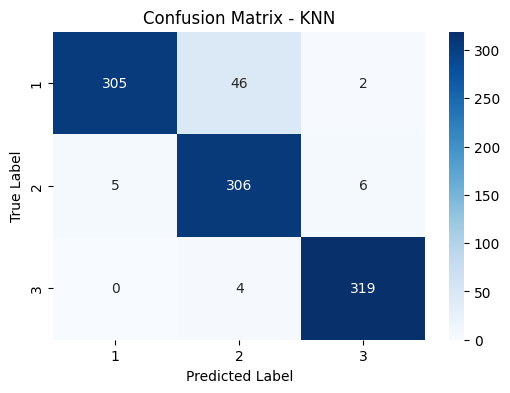


XGBoost - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



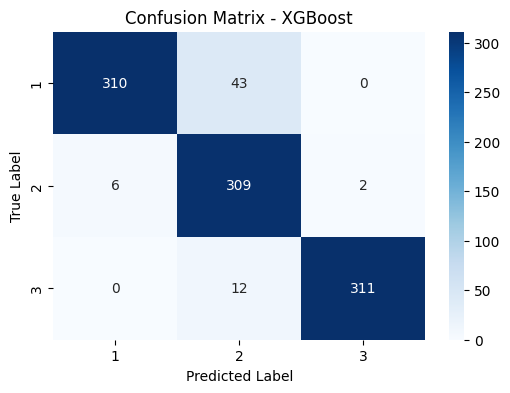


Random Forest - Accuracy: 95.57%
              precision    recall  f1-score   support

           1       0.99      0.92      0.95       353
           2       0.88      0.99      0.94       317
           3       1.00      0.96      0.98       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



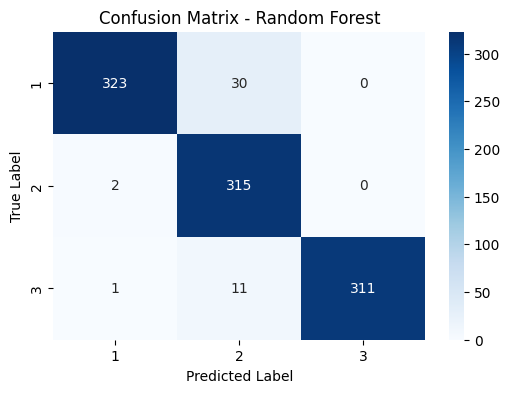


Gradient Boosting - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



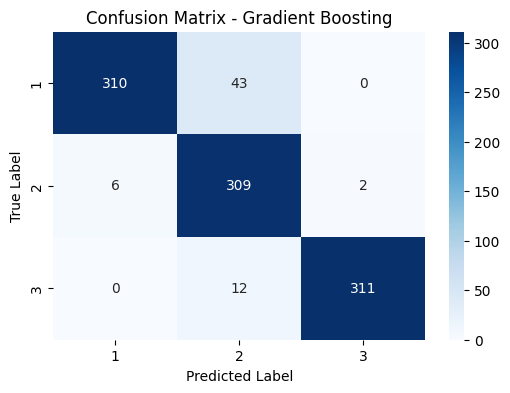


Ensemble Model - Accuracy: 95.87%
              precision    recall  f1-score   support

           1       0.99      0.91      0.95       353
           2       0.89      0.99      0.94       317
           3       1.00      0.98      0.99       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



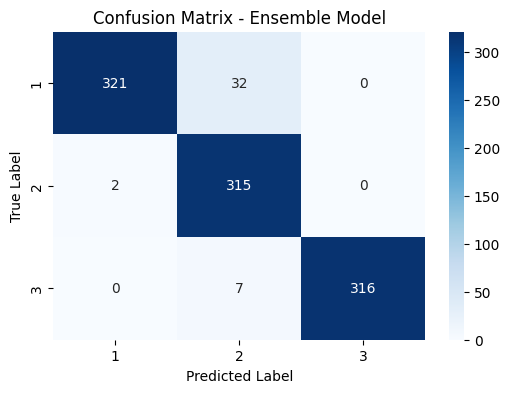

Predicted Class Number: 1
Predicted Class Name: Normal


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("fetal_health.csv")

# Define features and target
X = df.iloc[:, :-1].to_numpy()  # Features
y = df.iloc[:, -1].to_numpy().astype(int)  # Ensure integer class labels

# Display original class distribution
print("Original Class Distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to integer type (SMOTE might introduce float labels)
y_resampled = y_resampled.astype(int)

# Display new class distribution
print("After SMOTE Class Distribution:", Counter(y_resampled))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------
# ✅ 1. Manual K-Nearest Neighbors (KNN)
# --------------------------------------
class ManualKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)  # Efficient vectorized distance calculation
            k_neighbors = np.argsort(distances)[:self.k]
            labels = [self.y_train[i] for i in k_neighbors]
            predictions.append(Counter(labels).most_common(1)[0][0])
        return np.array(predictions)

# --------------------------------------
# ✅ 2. Manual XGBoost
# --------------------------------------
class XGBoostManual:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ 3. Manual Random Forest
# --------------------------------------
class ManualRandomForest:
    def __init__(self, n_trees=50, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            indices = np.random.choice(np.arange(len(X)), size=len(X), replace=True)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.round(np.mean(predictions, axis=0)).astype(int)

# --------------------------------------
# ✅ 4. Manual Gradient Boosting
# --------------------------------------
class ManualGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ Train and Evaluate Models
# --------------------------------------
models = {
    "KNN": ManualKNN(k=5),
    "XGBoost": XGBoostManual(n_estimators=100, learning_rate=0.1, max_depth=3),
    "Random Forest": ManualRandomForest(n_trees=50, max_depth=10),
    "Gradient Boosting": ManualGradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
}

predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    print(f"\n{name} - Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# ✅ Manual Ensembling (Majority Voting)
y_pred_ensemble = np.array([Counter([predictions[model][i] for model in models]).most_common(1)[0][0] for i in range(len(y_test))])

# Evaluate ensemble model
print(f"\nEnsemble Model - Accuracy: {accuracy_score(y_test, y_pred_ensemble) * 100:.2f}%")
print(classification_report(y_test, y_pred_ensemble))

# Plot Confusion Matrix for Ensemble Model
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Ensemble Model")
plt.show()

new_data_class_2 = pd.DataFrame({
    'baseline value': [133],  # Higher baseline value, could be indicative of a different class
    'accelerations': [0.003],  # Acceleration might be higher for class 2
    'fetal_movement': [0],  # Slightly more fetal movement
    'uterine_contractions': [0.008],  # Uterine contractions might be more frequent for class 2
    'light_decelerations': [0.003],  # Slightly more decelerations
    'severe_decelerations': [0],  # Mild severe deceleration
    'prolongued_decelerations': [0],  # Prolonged decelerations slightly higher
    'abnormal_short_term_variability': [16],  # Short term variability higher
    'mean_value_of_short_term_variability': [2.1],  # Increased mean value
    'percentage_of_time_with_abnormal_long_term_variability': [0],  # More time with abnormal long-term variability
    'mean_value_of_long_term_variability': [13.4],  # Increased mean value for long-term variability
    'histogram_width': [130],  # Wider histogram could indicate different characteristics
    'histogram_min': [68],
    'histogram_max': [198],  # Higher maximum could indicate a different class
    'histogram_number_of_peaks': [5],  # More peaks in the histogram
    'histogram_number_of_zeroes': [1],  # More zeros might correlate with different patterns
    'histogram_mode': [141],  # Mode might be higher
    'histogram_mean': [135],  # Higher mean value
    'histogram_median': [138],  # Higher median
    'histogram_variance': [13],  # More variance
    'histogram_tendency': [0]  # Slightly more tendency
})
# Class labels mapping
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}

# Scale the new data using the fitted scaler
# Convert DataFrame to NumPy array before scaling
new_data_scaled = scaler.transform(new_data_class_2.to_numpy())

# Predict using individual models
model_predictions = []
for name, model in models.items():
    pred = model.predict(new_data_scaled)
    model_predictions.append(pred[0])

# Majority voting (Ensemble Prediction)
final_prediction = Counter(model_predictions).most_common(1)[0][0]

# Get class name from class_labels dictionary
predicted_class_name = class_labels[final_prediction]

# Print final result
print(f"Predicted Class Number: {final_prediction}")
print(f"Predicted Class Name: {predicted_class_name}")




Original Class Distribution: Counter({1: 1655, 2: 295, 3: 176})
After SMOTE Class Distribution: Counter({2: 1655, 1: 1655, 3: 1655})

KNN - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.86      0.92       353
           2       0.86      0.97      0.91       317
           3       0.98      0.99      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



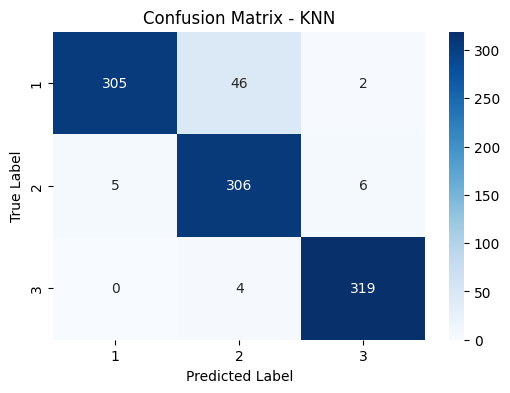


XGBoost - Accuracy: 93.55%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



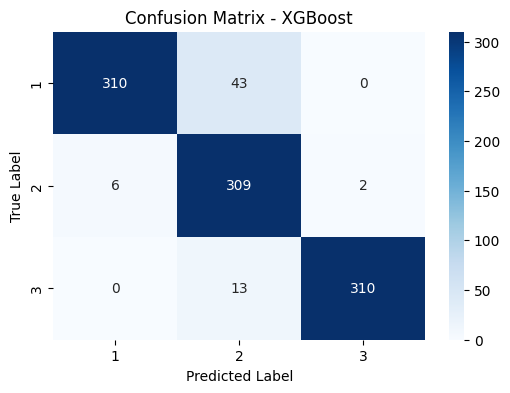


Random Forest - Accuracy: 95.97%
              precision    recall  f1-score   support

           1       0.99      0.93      0.96       353
           2       0.89      0.99      0.94       317
           3       1.00      0.96      0.98       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



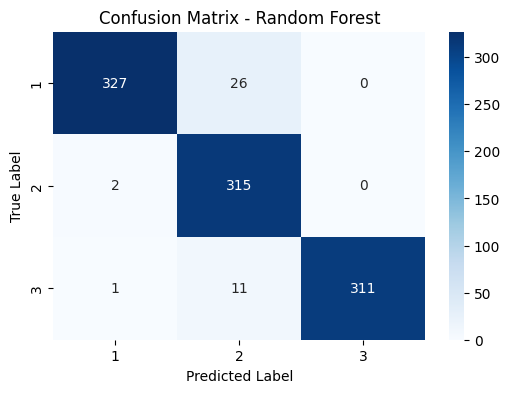


Gradient Boosting - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



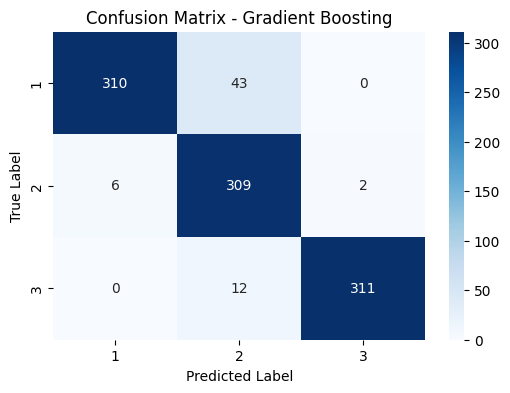


Ensemble Model - Accuracy: 96.27%
              precision    recall  f1-score   support

           1       1.00      0.92      0.96       353
           2       0.90      1.00      0.94       317
           3       1.00      0.98      0.99       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.97      0.96      0.96       993



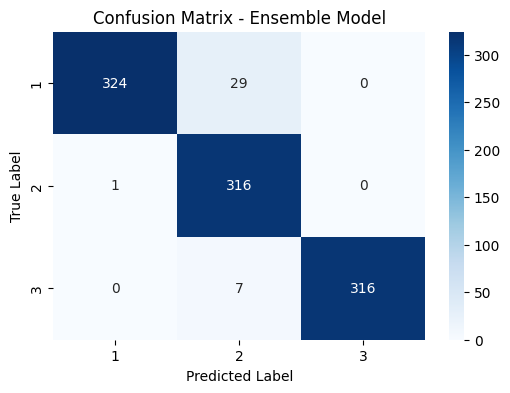

Predicted Class Number: 2
Predicted Class Name: Suspect


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("fetal_health.csv")

# Define features and target
X = df.iloc[:, :-1].to_numpy()  # Features
y = df.iloc[:, -1].to_numpy().astype(int)  # Ensure integer class labels

# Display original class distribution
print("Original Class Distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to integer type (SMOTE might introduce float labels)
y_resampled = y_resampled.astype(int)

# Display new class distribution
print("After SMOTE Class Distribution:", Counter(y_resampled))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------
# ✅ 1. Manual K-Nearest Neighbors (KNN)
# --------------------------------------
class ManualKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)  # Efficient vectorized distance calculation
            k_neighbors = np.argsort(distances)[:self.k]
            labels = [self.y_train[i] for i in k_neighbors]
            predictions.append(Counter(labels).most_common(1)[0][0])
        return np.array(predictions)

# --------------------------------------
# ✅ 2. Manual XGBoost
# --------------------------------------
class XGBoostManual:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ 3. Manual Random Forest
# --------------------------------------
class ManualRandomForest:
    def __init__(self, n_trees=50, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            indices = np.random.choice(np.arange(len(X)), size=len(X), replace=True)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.round(np.mean(predictions, axis=0)).astype(int)

# --------------------------------------
# ✅ 4. Manual Gradient Boosting
# --------------------------------------
class ManualGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ Train and Evaluate Models
# --------------------------------------
models = {
    "KNN": ManualKNN(k=5),
    "XGBoost": XGBoostManual(n_estimators=100, learning_rate=0.1, max_depth=3),
    "Random Forest": ManualRandomForest(n_trees=50, max_depth=10),
    "Gradient Boosting": ManualGradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
}

predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    print(f"\n{name} - Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# ✅ Manual Ensembling (Majority Voting)
y_pred_ensemble = np.array([Counter([predictions[model][i] for model in models]).most_common(1)[0][0] for i in range(len(y_test))])

# Evaluate ensemble model
print(f"\nEnsemble Model - Accuracy: {accuracy_score(y_test, y_pred_ensemble) * 100:.2f}%")
print(classification_report(y_test, y_pred_ensemble))

# Plot Confusion Matrix for Ensemble Model
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Ensemble Model")
plt.show()

new_data_class_2 = pd.DataFrame({
    'baseline value': [120],  # Higher baseline value, could be indicative of a different class
    'accelerations': [0],  # Acceleration might be higher for class 2
    'fetal_movement': [0],  # Slightly more fetal movement
    'uterine_contractions': [0],  # Uterine contractions might be more frequent for class 2
    'light_decelerations': [0],  # Slightly more decelerations
    'severe_decelerations': [0],  # Mild severe deceleration
    'prolongued_decelerations': [0],  # Prolonged decelerations slightly higher
    'abnormal_short_term_variability': [73],  # Short term variability higher
    'mean_value_of_short_term_variability': [0.5],  # Increased mean value
    'percentage_of_time_with_abnormal_long_term_variability': [43],  # More time with abnormal long-term variability
    'mean_value_of_long_term_variability': [2.4],  # Increased mean value for long-term variability
    'histogram_width': [64],  # Wider histogram could indicate different characteristics
    'histogram_min': [62],
    'histogram_max': [126],  # Higher maximum could indicate a different class
    'histogram_number_of_peaks': [2],  # More peaks in the histogram
    'histogram_number_of_zeroes': [0],  # More zeros might correlate with different patterns
    'histogram_mode': [120],  # Mode might be higher
    'histogram_mean': [137],  # Higher mean value
    'histogram_median': [121],  # Higher median
    'histogram_variance': [73],  # More variance
    'histogram_tendency': [1]  # Slightly more tendency
})
# Class labels mapping
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}

# Scale the new data using the fitted scaler
# Convert DataFrame to NumPy array before scaling
new_data_scaled = scaler.transform(new_data_class_2.to_numpy())

# Predict using individual models
model_predictions = []
for name, model in models.items():
    pred = model.predict(new_data_scaled)
    model_predictions.append(pred[0])

# Majority voting (Ensemble Prediction)
final_prediction = Counter(model_predictions).most_common(1)[0][0]

# Get class name from class_labels dictionary
predicted_class_name = class_labels[final_prediction]

# Print final result
print(f"Predicted Class Number: {final_prediction}")
print(f"Predicted Class Name: {predicted_class_name}")






Original Class Distribution: Counter({1: 1655, 2: 295, 3: 176})
After SMOTE Class Distribution: Counter({2: 1655, 1: 1655, 3: 1655})

KNN - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.86      0.92       353
           2       0.86      0.97      0.91       317
           3       0.98      0.99      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



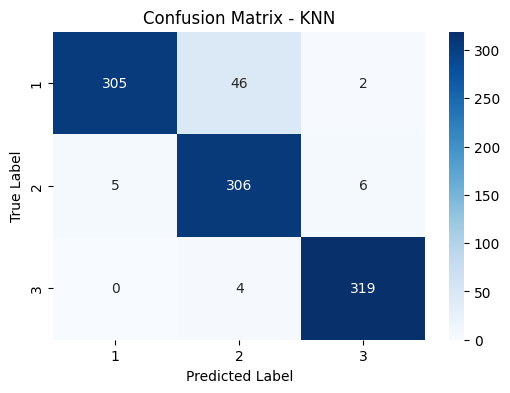


XGBoost - Accuracy: 93.55%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



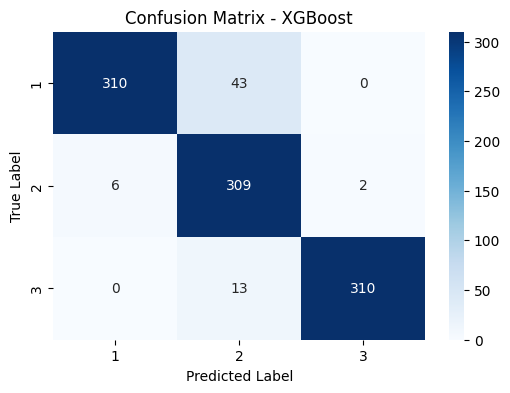


Random Forest - Accuracy: 95.87%
              precision    recall  f1-score   support

           1       0.99      0.93      0.96       353
           2       0.90      0.99      0.94       317
           3       1.00      0.97      0.98       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



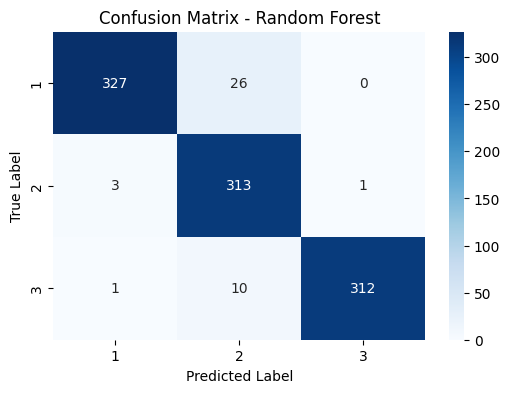


Gradient Boosting - Accuracy: 93.55%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



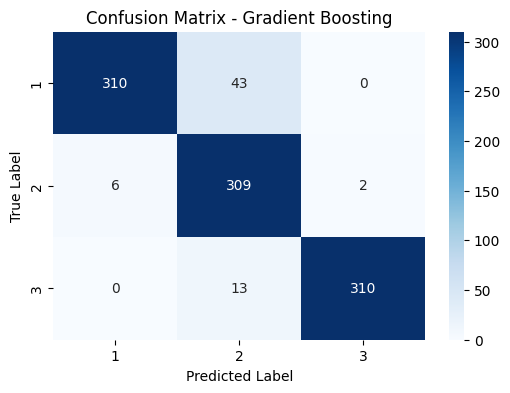


Ensemble Model - Accuracy: 96.17%
              precision    recall  f1-score   support

           1       0.99      0.92      0.96       353
           2       0.90      0.99      0.94       317
           3       1.00      0.98      0.99       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.97      0.96      0.96       993



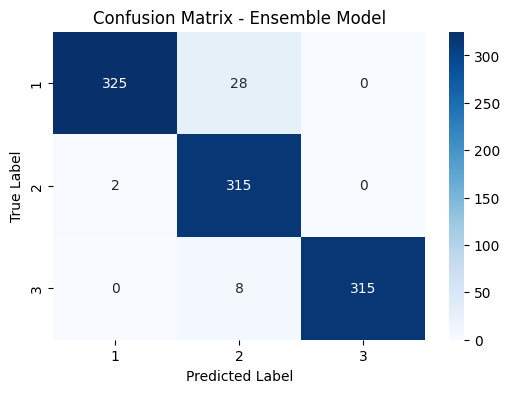

PermutationExplainer explainer: 2it [00:28, 28.35s/it]               



🔍 **Top Contributing Features for Ensemble Prediction:**
abnormal_short_term_variability: 0.2373
accelerations: 0.1991
histogram_mean: 0.1485
percentage_of_time_with_abnormal_long_term_variability: 0.1005
prolongued_decelerations: 0.0888
histogram_mode: 0.0627
uterine_contractions: 0.0624
histogram_median: 0.0355
histogram_min: 0.0270
mean_value_of_short_term_variability: 0.0187

🎯 **Predicted Class Number:** 1
🎯 **Predicted Class Name:** Normal


In [ ]:
import numpy as np
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("fetal_health.csv")

# Define features and target
X = df.iloc[:, :-1].to_numpy()  # Features
y = df.iloc[:, -1].to_numpy().astype(int)  # Ensure integer class labels

# Display original class distribution
print("Original Class Distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to integer type (SMOTE might introduce float labels)
y_resampled = y_resampled.astype(int)

# Display new class distribution
print("After SMOTE Class Distribution:", Counter(y_resampled))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------
# ✅ 1. Manual K-Nearest Neighbors (KNN)
# --------------------------------------
class ManualKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)  # Efficient vectorized distance calculation
            k_neighbors = np.argsort(distances)[:self.k]
            labels = [self.y_train[i] for i in k_neighbors]
            predictions.append(Counter(labels).most_common(1)[0][0])
        return np.array(predictions)

# --------------------------------------
# ✅ 2. Manual XGBoost
# --------------------------------------
class XGBoostManual:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ 3. Manual Random Forest
# --------------------------------------
class ManualRandomForest:
    def __init__(self, n_trees=50, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            indices = np.random.choice(np.arange(len(X)), size=len(X), replace=True)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.round(np.mean(predictions, axis=0)).astype(int)

# --------------------------------------
# ✅ 4. Manual Gradient Boosting
# --------------------------------------
class ManualGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ Train and Evaluate Models
# --------------------------------------
models = {
    "KNN": ManualKNN(k=5),
    "XGBoost": XGBoostManual(n_estimators=100, learning_rate=0.1, max_depth=3),
    "Random Forest": ManualRandomForest(n_trees=50, max_depth=10),
    "Gradient Boosting": ManualGradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
}

predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    print(f"\n{name} - Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

 # ✅ Manual Ensembling (Majority Voting)
y_pred_ensemble = np.array([
    Counter([predictions[model][i] for model in models]).most_common(1)[0][0]
    for i in range(len(y_test))
])

# Evaluate Ensemble Model
print(f"\nEnsemble Model - Accuracy: {accuracy_score(y_test, y_pred_ensemble) * 100:.2f}%")
print(classification_report(y_test, y_pred_ensemble))

# ✅ Confusion Matrix for Ensemble Model
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Ensemble Model")
plt.show()

# ✅ New Data Sample
new_data_class_2 = pd.DataFrame({
    'baseline value': [133],
    'accelerations': [0.003],
    'fetal_movement': [0],
    'uterine_contractions': [0.008],
    'light_decelerations': [0.003],
    'severe_decelerations': [0],
    'prolongued_decelerations': [0],
    'abnormal_short_term_variability': [16],
    'mean_value_of_short_term_variability': [2.1],
    'percentage_of_time_with_abnormal_long_term_variability': [0],
    'mean_value_of_long_term_variability': [13.4],
    'histogram_width': [130],
    'histogram_min': [68],
    'histogram_max': [198],
    'histogram_number_of_peaks': [5],
    'histogram_number_of_zeroes': [1],
    'histogram_mode': [141],
    'histogram_mean': [135],
    'histogram_median': [138],
    'histogram_variance': [13],
    'histogram_tendency': [0]
})

# ✅ Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data_class_2.to_numpy())

# ✅ Predict using individual models
model_predictions = []
shap_values_list = []
for name, model in models.items():
    pred = model.predict(new_data_scaled)
    model_predictions.append(pred[0])

    # Compute SHAP values
    explainer = shap.Explainer(model.predict, X_train_scaled)
    shap_values = explainer(new_data_scaled)
    shap_values_list.append(shap_values.values)

# ✅ Majority Voting (Ensemble Prediction)
final_prediction = Counter(model_predictions).most_common(1)[0][0]

# ✅ Class Labels Mapping
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
predicted_class_name = class_labels[final_prediction]

# ✅ Aggregate SHAP values across models (mean absolute SHAP importance)
mean_shap_values = np.abs(np.mean(shap_values_list, axis=0))[0]
feature_names = new_data_class_2.columns

# ✅ Sort and Display Top Features
shap_importance = sorted(zip(feature_names, mean_shap_values), key=lambda x: x[1], reverse=True)

print(f"\n🔍 **Top Contributing Features for Ensemble Prediction:**")
for feature, value in shap_importance[:10]:  # Display top 10 features
    print(f"{feature}: {value:.4f}")

# ✅ Final Prediction Output
print(f"\n🎯 **Predicted Class Number:** {final_prediction}")
print(f"🎯 **Predicted Class Name:** {predicted_class_name}")

Original Class Distribution: Counter({1: 1655, 2: 295, 3: 176})
After SMOTE Class Distribution: Counter({2: 1655, 1: 1655, 3: 1655})

KNN - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.86      0.92       353
           2       0.86      0.97      0.91       317
           3       0.98      0.99      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



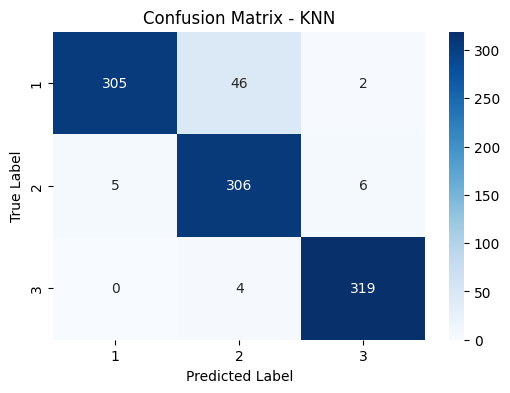


XGBoost - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



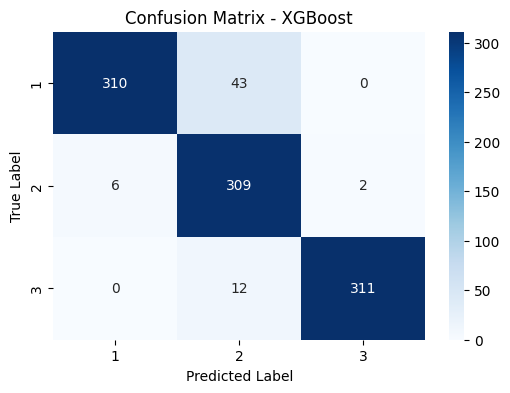


Random Forest - Accuracy: 95.67%
              precision    recall  f1-score   support

           1       0.99      0.92      0.95       353
           2       0.88      0.99      0.94       317
           3       1.00      0.96      0.98       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



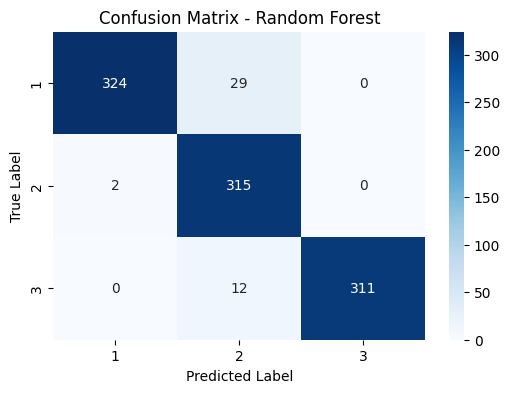


Gradient Boosting - Accuracy: 93.55%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



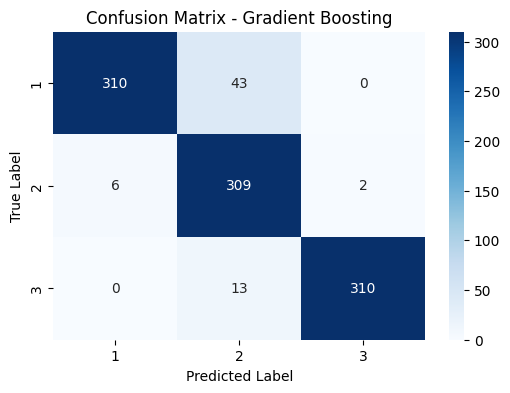


Ensemble Model - Accuracy: 96.17%
              precision    recall  f1-score   support

           1       1.00      0.92      0.95       353
           2       0.90      1.00      0.94       317
           3       1.00      0.98      0.99       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.97      0.96      0.96       993



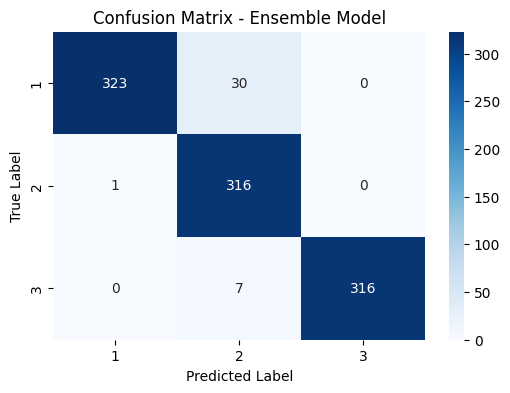

PermutationExplainer explainer: 2it [00:28, 28.65s/it]               



🔍 **SHAP Values for All 21 Features (Sorted by Importance):**
abnormal_short_term_variability: 0.2335
accelerations: 0.1850
histogram_mean: 0.1603
percentage_of_time_with_abnormal_long_term_variability: 0.1089
prolongued_decelerations: 0.0924
histogram_mode: 0.0615
uterine_contractions: 0.0535
histogram_median: 0.0422
histogram_min: 0.0248
histogram_max: 0.0156
mean_value_of_short_term_variability: 0.0124
severe_decelerations: 0.0109
histogram_variance: 0.0100
histogram_tendency: 0.0064
light_decelerations: 0.0062
baseline value: 0.0061
histogram_width: 0.0053
histogram_number_of_peaks: 0.0051
histogram_number_of_zeroes: 0.0040
fetal_movement: 0.0028
mean_value_of_long_term_variability: 0.0028

🎯 **Predicted Class Number:** 1
🎯 **Predicted Class Name:** Normal


In [ ]:
import numpy as np
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("fetal_health.csv")

# Define features and target
X = df.iloc[:, :-1].to_numpy()  # Features
y = df.iloc[:, -1].to_numpy().astype(int)  # Ensure integer class labels

# Display original class distribution
print("Original Class Distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to integer type (SMOTE might introduce float labels)
y_resampled = y_resampled.astype(int)

# Display new class distribution
print("After SMOTE Class Distribution:", Counter(y_resampled))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------
# ✅ 1. Manual K-Nearest Neighbors (KNN)
# --------------------------------------
class ManualKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)  # Efficient vectorized distance calculation
            k_neighbors = np.argsort(distances)[:self.k]
            labels = [self.y_train[i] for i in k_neighbors]
            predictions.append(Counter(labels).most_common(1)[0][0])
        return np.array(predictions)

# --------------------------------------
# ✅ 2. Manual XGBoost
# --------------------------------------
class XGBoostManual:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ 3. Manual Random Forest
# --------------------------------------
class ManualRandomForest:
    def __init__(self, n_trees=50, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            indices = np.random.choice(np.arange(len(X)), size=len(X), replace=True)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.round(np.mean(predictions, axis=0)).astype(int)

# --------------------------------------
# ✅ 4. Manual Gradient Boosting
# --------------------------------------
class ManualGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ Train and Evaluate Models
# --------------------------------------
models = {
    "KNN": ManualKNN(k=5),
    "XGBoost": XGBoostManual(n_estimators=100, learning_rate=0.1, max_depth=3),
    "Random Forest": ManualRandomForest(n_trees=50, max_depth=10),
    "Gradient Boosting": ManualGradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
}

predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    print(f"\n{name} - Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

 # ✅ Manual Ensembling (Majority Voting)
y_pred_ensemble = np.array([
    Counter([predictions[model][i] for model in models]).most_common(1)[0][0]
    for i in range(len(y_test))
])

# Evaluate Ensemble Model
print(f"\nEnsemble Model - Accuracy: {accuracy_score(y_test, y_pred_ensemble) * 100:.2f}%")
print(classification_report(y_test, y_pred_ensemble))

# ✅ Confusion Matrix for Ensemble Model
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Ensemble Model")
plt.show()

# ✅ New Data Sample
new_data_class_2 = pd.DataFrame({
    'baseline value': [133],
    'accelerations': [0.003],
    'fetal_movement': [0],
    'uterine_contractions': [0.008],
    'light_decelerations': [0.003],
    'severe_decelerations': [0],
    'prolongued_decelerations': [0],
    'abnormal_short_term_variability': [16],
    'mean_value_of_short_term_variability': [2.1],
    'percentage_of_time_with_abnormal_long_term_variability': [0],
    'mean_value_of_long_term_variability': [13.4],
    'histogram_width': [130],
    'histogram_min': [68],
    'histogram_max': [198],
    'histogram_number_of_peaks': [5],
    'histogram_number_of_zeroes': [1],
    'histogram_mode': [141],
    'histogram_mean': [135],
    'histogram_median': [138],
    'histogram_variance': [13],
    'histogram_tendency': [0]
})

# ✅ Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data_class_2.to_numpy())

# ✅ Predict using individual models
model_predictions = []
shap_values_list = []
for name, model in models.items():
    pred = model.predict(new_data_scaled)
    model_predictions.append(pred[0])

    # Compute SHAP values
    explainer = shap.Explainer(model.predict, X_train_scaled)
    shap_values = explainer(new_data_scaled)
    shap_values_list.append(shap_values.values)

# ✅ Majority Voting (Ensemble Prediction)
final_prediction = Counter(model_predictions).most_common(1)[0][0]

# ✅ Class Labels Mapping
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
predicted_class_name = class_labels[final_prediction]

# ✅ Aggregate SHAP values across models (mean absolute SHAP importance)
mean_shap_values = np.abs(np.mean(shap_values_list, axis=0))[0]
feature_names = new_data_class_2.columns

# ✅ Sort and Display Top Features
shap_importance = sorted(zip(feature_names, mean_shap_values), key=lambda x: x[1], reverse=True)

print(f"\n🔍 **SHAP Values for All 21 Features (Sorted by Importance):**")
for feature, value in shap_importance:
    print(f"{feature}: {value:.4f}")  # Display all features


# ✅ Final Prediction Output
print(f"\n🎯 **Predicted Class Number:** {final_prediction}")
print(f"🎯 **Predicted Class Name:** {predicted_class_name}")

Original Class Distribution: Counter({1: 1655, 2: 295, 3: 176})
After SMOTE Class Distribution: Counter({2: 1655, 1: 1655, 3: 1655})

KNN - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.86      0.92       353
           2       0.86      0.97      0.91       317
           3       0.98      0.99      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



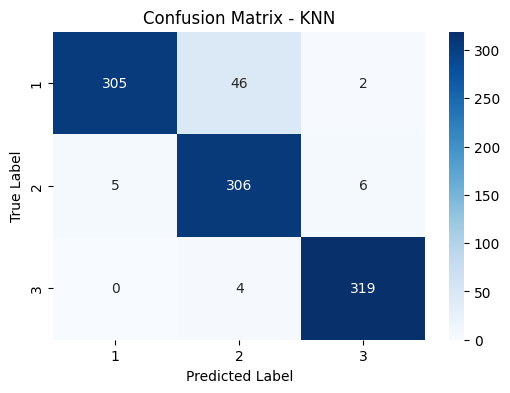


XGBoost - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



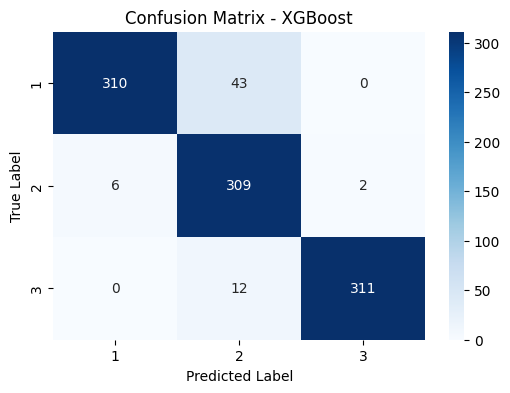


Random Forest - Accuracy: 95.47%
              precision    recall  f1-score   support

           1       0.99      0.92      0.95       353
           2       0.88      0.99      0.93       317
           3       1.00      0.96      0.98       323

    accuracy                           0.95       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.95      0.96       993



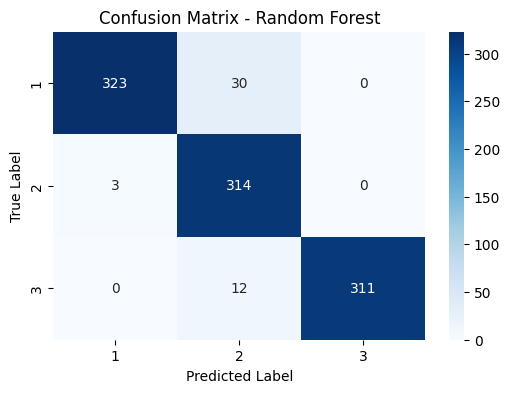


Gradient Boosting - Accuracy: 93.55%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



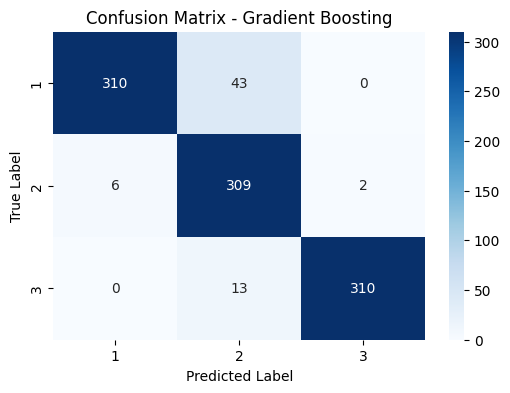


Ensemble Model - Accuracy: 96.17%
              precision    recall  f1-score   support

           1       0.99      0.92      0.95       353
           2       0.90      0.99      0.94       317
           3       1.00      0.98      0.99       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.97      0.96      0.96       993



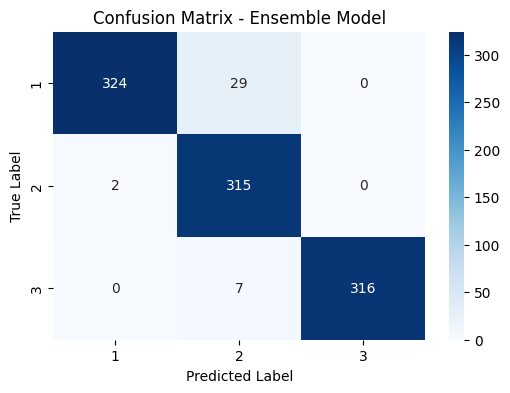

PermutationExplainer explainer: 2it [00:26, 26.69s/it]               



🔍 **SHAP Values for All 21 Features (Sorted by Importance):**
abnormal_short_term_variability: 0.1976
histogram_mean: 0.1495
accelerations: 0.0831
prolongued_decelerations: 0.0828
uterine_contractions: 0.0372
histogram_max: 0.0366
percentage_of_time_with_abnormal_long_term_variability: 0.0352
histogram_mode: 0.0192
baseline value: 0.0130
histogram_number_of_peaks: 0.0074
histogram_tendency: 0.0072
light_decelerations: 0.0043
severe_decelerations: 0.0043
histogram_min: 0.0034
histogram_variance: 0.0028
histogram_number_of_zeroes: 0.0025
histogram_width: 0.0020
fetal_movement: 0.0019
mean_value_of_short_term_variability: 0.0019
mean_value_of_long_term_variability: 0.0015
histogram_median: 0.0006

🎯 **Predicted Class Number:** 2
🎯 **Predicted Class Name:** Suspect


In [ ]:
import numpy as np
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("fetal_health.csv")

# Define features and target
X = df.iloc[:, :-1].to_numpy()  # Features
y = df.iloc[:, -1].to_numpy().astype(int)  # Ensure integer class labels

# Display original class distribution
print("Original Class Distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to integer type (SMOTE might introduce float labels)
y_resampled = y_resampled.astype(int)

# Display new class distribution
print("After SMOTE Class Distribution:", Counter(y_resampled))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------
# ✅ 1. Manual K-Nearest Neighbors (KNN)
# --------------------------------------
class ManualKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)  # Efficient vectorized distance calculation
            k_neighbors = np.argsort(distances)[:self.k]
            labels = [self.y_train[i] for i in k_neighbors]
            predictions.append(Counter(labels).most_common(1)[0][0])
        return np.array(predictions)

# --------------------------------------
# ✅ 2. Manual XGBoost
# --------------------------------------
class XGBoostManual:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ 3. Manual Random Forest
# --------------------------------------
class ManualRandomForest:
    def __init__(self, n_trees=50, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            indices = np.random.choice(np.arange(len(X)), size=len(X), replace=True)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.round(np.mean(predictions, axis=0)).astype(int)

# --------------------------------------
# ✅ 4. Manual Gradient Boosting
# --------------------------------------
class ManualGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ Train and Evaluate Models
# --------------------------------------
models = {
    "KNN": ManualKNN(k=5),
    "XGBoost": XGBoostManual(n_estimators=100, learning_rate=0.1, max_depth=3),
    "Random Forest": ManualRandomForest(n_trees=50, max_depth=10),
    "Gradient Boosting": ManualGradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
}

predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    print(f"\n{name} - Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

 # ✅ Manual Ensembling (Majority Voting)
y_pred_ensemble = np.array([
    Counter([predictions[model][i] for model in models]).most_common(1)[0][0]
    for i in range(len(y_test))
])

# Evaluate Ensemble Model
print(f"\nEnsemble Model - Accuracy: {accuracy_score(y_test, y_pred_ensemble) * 100:.2f}%")
print(classification_report(y_test, y_pred_ensemble))

# ✅ Confusion Matrix for Ensemble Model
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Ensemble Model")
plt.show()

# ✅ New Data Sample
new_data_class_2 = pd.DataFrame({
    'baseline value': [120],
    'accelerations': [0],
    'fetal_movement': [0],
    'uterine_contractions': [0],
    'light_decelerations': [0],
    'severe_decelerations': [0],
    'prolongued_decelerations': [0],
    'abnormal_short_term_variability': [73],
    'mean_value_of_short_term_variability': [0.5],
    'percentage_of_time_with_abnormal_long_term_variability': [43],
    'mean_value_of_long_term_variability': [2.4],
    'histogram_width': [64],
    'histogram_min': [62],
    'histogram_max': [126],
    'histogram_number_of_peaks': [2],
    'histogram_number_of_zeroes': [0],
    'histogram_mode': [120],
    'histogram_mean': [137],
    'histogram_median': [121],
    'histogram_variance': [73],
    'histogram_tendency': [1]
})

# ✅ Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data_class_2.to_numpy())

# ✅ Predict using individual models
model_predictions = []
shap_values_list = []
for name, model in models.items():
    pred = model.predict(new_data_scaled)
    model_predictions.append(pred[0])

    # Compute SHAP values
    explainer = shap.Explainer(model.predict, X_train_scaled)
    shap_values = explainer(new_data_scaled)
    shap_values_list.append(shap_values.values)

# ✅ Majority Voting (Ensemble Prediction)
final_prediction = Counter(model_predictions).most_common(1)[0][0]

# ✅ Class Labels Mapping
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
predicted_class_name = class_labels[final_prediction]

# ✅ Aggregate SHAP values across models (mean absolute SHAP importance)
mean_shap_values = np.abs(np.mean(shap_values_list, axis=0))[0]
feature_names = new_data_class_2.columns

# ✅ Sort and Display Top Features
shap_importance = sorted(zip(feature_names, mean_shap_values), key=lambda x: x[1], reverse=True)

print(f"\n🔍 **SHAP Values for All 21 Features (Sorted by Importance):**")
for feature, value in shap_importance:
    print(f"{feature}: {value:.4f}")  # Display all features


# ✅ Final Prediction Output
print(f"\n🎯 **Predicted Class Number:** {final_prediction}")
print(f"🎯 **Predicted Class Name:** {predicted_class_name}")

Original Class Distribution: Counter({1: 1655, 2: 295, 3: 176})
After SMOTE Class Distribution: Counter({2: 1655, 1: 1655, 3: 1655})

KNN - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.86      0.92       353
           2       0.86      0.97      0.91       317
           3       0.98      0.99      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



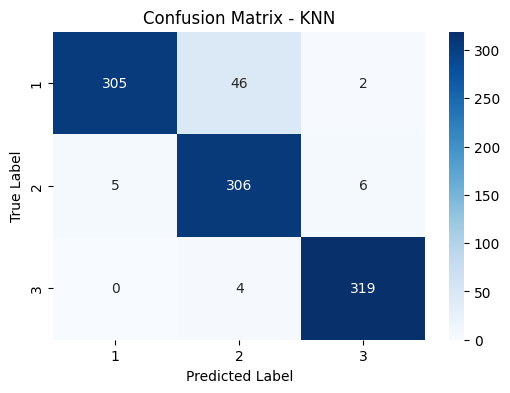


XGBoost - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



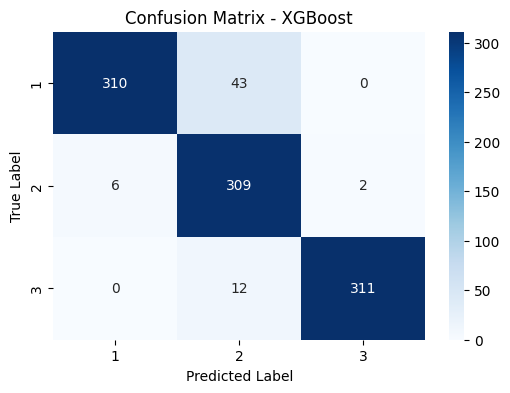


Random Forest - Accuracy: 95.57%
              precision    recall  f1-score   support

           1       0.99      0.92      0.95       353
           2       0.89      0.99      0.94       317
           3       1.00      0.96      0.98       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



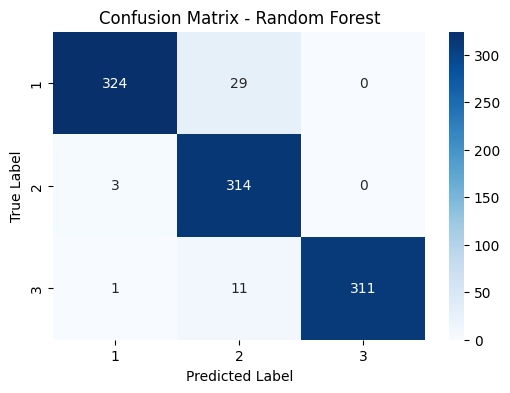


Gradient Boosting - Accuracy: 93.55%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



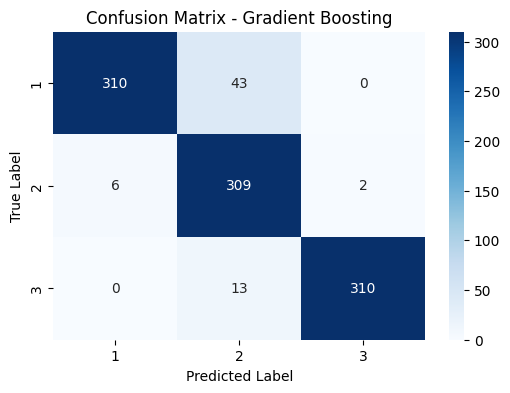


Ensemble Model - Accuracy: 96.07%
              precision    recall  f1-score   support

           1       1.00      0.91      0.95       353
           2       0.89      1.00      0.94       317
           3       1.00      0.98      0.99       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



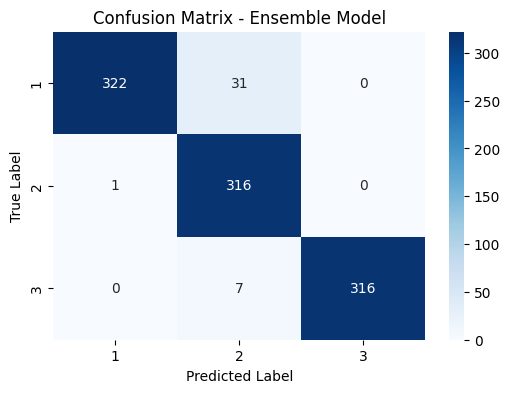

PermutationExplainer explainer: 2it [00:29, 29.34s/it]               



🔍 **SHAP Values for All 21 Features (Sorted by Importance):**
prolongued_decelerations: 0.3605
histogram_mean: 0.3370
histogram_min: 0.1803
histogram_mode: 0.1800
abnormal_short_term_variability: 0.1297
histogram_variance: 0.1293
percentage_of_time_with_abnormal_long_term_variability: 0.0615
histogram_median: 0.0502
mean_value_of_short_term_variability: 0.0411
accelerations: 0.0284
light_decelerations: 0.0197
histogram_number_of_zeroes: 0.0175
mean_value_of_long_term_variability: 0.0148
histogram_number_of_peaks: 0.0147
baseline value: 0.0115
histogram_max: 0.0106
histogram_width: 0.0060
histogram_tendency: 0.0042
uterine_contractions: 0.0028
severe_decelerations: 0.0015
fetal_movement: 0.0001

🎯 **Predicted Class Number:** 3
🎯 **Predicted Class Name:** Pathological


In [ ]:
import numpy as np
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("fetal_health.csv")

# Define features and target
X = df.iloc[:, :-1].to_numpy()  # Features
y = df.iloc[:, -1].to_numpy().astype(int)  # Ensure integer class labels

# Display original class distribution
print("Original Class Distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to integer type (SMOTE might introduce float labels)
y_resampled = y_resampled.astype(int)

# Display new class distribution
print("After SMOTE Class Distribution:", Counter(y_resampled))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------
# ✅ 1. Manual K-Nearest Neighbors (KNN)
# --------------------------------------
class ManualKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)  # Efficient vectorized distance calculation
            k_neighbors = np.argsort(distances)[:self.k]
            labels = [self.y_train[i] for i in k_neighbors]
            predictions.append(Counter(labels).most_common(1)[0][0])
        return np.array(predictions)

# --------------------------------------
# ✅ 2. Manual XGBoost
# --------------------------------------
class XGBoostManual:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ 3. Manual Random Forest
# --------------------------------------
class ManualRandomForest:
    def __init__(self, n_trees=50, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            indices = np.random.choice(np.arange(len(X)), size=len(X), replace=True)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.round(np.mean(predictions, axis=0)).astype(int)

# --------------------------------------
# ✅ 4. Manual Gradient Boosting
# --------------------------------------
class ManualGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ Train and Evaluate Models
# --------------------------------------
models = {
    "KNN": ManualKNN(k=5),
    "XGBoost": XGBoostManual(n_estimators=100, learning_rate=0.1, max_depth=3),
    "Random Forest": ManualRandomForest(n_trees=50, max_depth=10),
    "Gradient Boosting": ManualGradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
}

predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    print(f"\n{name} - Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

 # ✅ Manual Ensembling (Majority Voting)
y_pred_ensemble = np.array([
    Counter([predictions[model][i] for model in models]).most_common(1)[0][0]
    for i in range(len(y_test))
])

# Evaluate Ensemble Model
print(f"\nEnsemble Model - Accuracy: {accuracy_score(y_test, y_pred_ensemble) * 100:.2f}%")
print(classification_report(y_test, y_pred_ensemble))

# ✅ Confusion Matrix for Ensemble Model
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Ensemble Model")
plt.show()

# ✅ New Data Sample
new_data_class_2 = pd.DataFrame({
    'baseline value': [134],
    'accelerations': [0.001],
    'fetal_movement': [0],
    'uterine_contractions': [0.013],
    'light_decelerations': [0.008],
    'severe_decelerations': [0],
    'prolongued_decelerations': [0.003],
    'abnormal_short_term_variability': [29],
    'mean_value_of_short_term_variability': [6.3],
    'percentage_of_time_with_abnormal_long_term_variability': [0],
    'mean_value_of_long_term_variability': [0],
    'histogram_width': [150],
    'histogram_min': [50],
    'histogram_max': [200],
    'histogram_number_of_peaks': [6],
    'histogram_number_of_zeroes': [3],
    'histogram_mode': [71],
    'histogram_mean': [107],
    'histogram_median': [106],
    'histogram_variance': [215],
    'histogram_tendency': [0]
})

# ✅ Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data_class_2.to_numpy())

# ✅ Predict using individual models
model_predictions = []
shap_values_list = []
for name, model in models.items():
    pred = model.predict(new_data_scaled)
    model_predictions.append(pred[0])

    # Compute SHAP values
    explainer = shap.Explainer(model.predict, X_train_scaled)
    shap_values = explainer(new_data_scaled)
    shap_values_list.append(shap_values.values)

# ✅ Majority Voting (Ensemble Prediction)
final_prediction = Counter(model_predictions).most_common(1)[0][0]

# ✅ Class Labels Mapping
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
predicted_class_name = class_labels[final_prediction]

# ✅ Aggregate SHAP values across models (mean absolute SHAP importance)
mean_shap_values = np.abs(np.mean(shap_values_list, axis=0))[0]
feature_names = new_data_class_2.columns

# ✅ Sort and Display Top Features
shap_importance = sorted(zip(feature_names, mean_shap_values), key=lambda x: x[1], reverse=True)

print(f"\n🔍 **SHAP Values for All 21 Features (Sorted by Importance):**")
for feature, value in shap_importance:
    print(f"{feature}: {value:.4f}")  # Display all features


# ✅ Final Prediction Output
print(f"\n🎯 **Predicted Class Number:** {final_prediction}")
print(f"🎯 **Predicted Class Name:** {predicted_class_name}")

Original Class Distribution: Counter({1: 1655, 2: 295, 3: 176})
After SMOTE Class Distribution: Counter({2: 1655, 1: 1655, 3: 1655})

KNN - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.86      0.92       353
           2       0.86      0.97      0.91       317
           3       0.98      0.99      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



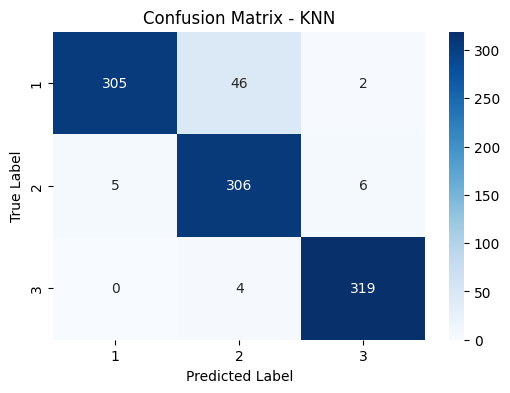


XGBoost - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



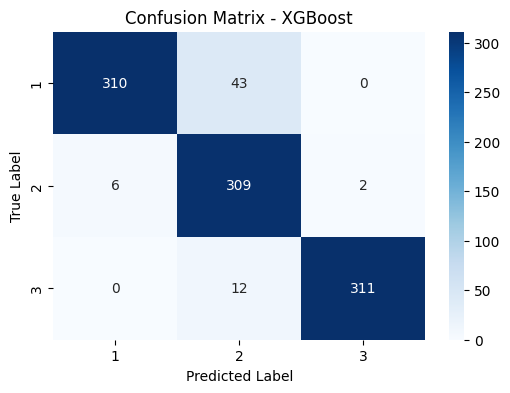


Random Forest - Accuracy: 95.57%
              precision    recall  f1-score   support

           1       0.99      0.92      0.95       353
           2       0.89      0.99      0.94       317
           3       1.00      0.96      0.98       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



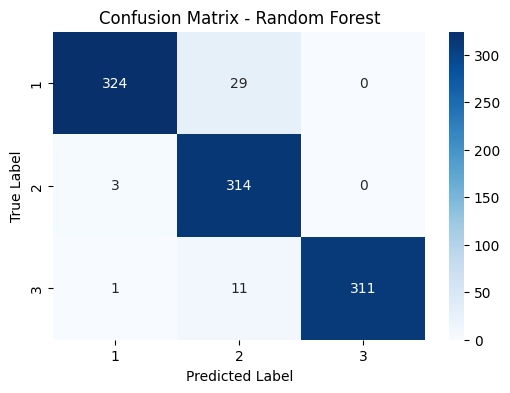


Gradient Boosting - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



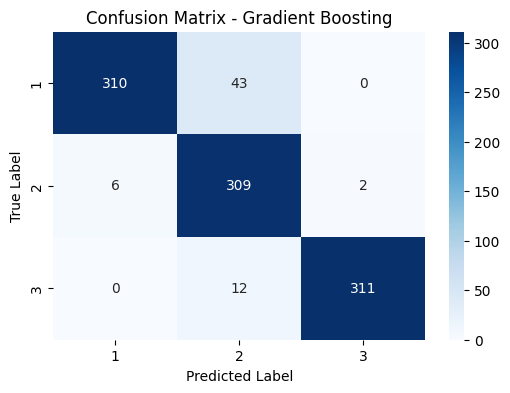


Ensemble Model - Accuracy: 96.17%
              precision    recall  f1-score   support

           1       1.00      0.92      0.95       353
           2       0.90      1.00      0.94       317
           3       1.00      0.98      0.99       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.97      0.96      0.96       993



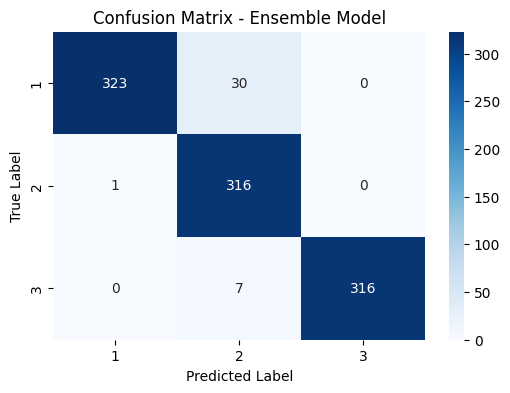

PermutationExplainer explainer: 2it [00:30, 30.58s/it]               



🔍 **Top Contributing Features for Ensemble Prediction:**
histogram_mean: 0.3320
prolongued_decelerations: 0.2933
histogram_min: 0.2062

🎯 **Predicted Class Number:** 3
🎯 **Predicted Class Name:** Pathological


In [ ]:
import numpy as np
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("fetal_health.csv")

# Define features and target
X = df.iloc[:, :-1].to_numpy()  # Features
y = df.iloc[:, -1].to_numpy().astype(int)  # Ensure integer class labels

# Display original class distribution
print("Original Class Distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to integer type (SMOTE might introduce float labels)
y_resampled = y_resampled.astype(int)

# Display new class distribution
print("After SMOTE Class Distribution:", Counter(y_resampled))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------
# ✅ 1. Manual K-Nearest Neighbors (KNN)
# --------------------------------------
class ManualKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)  # Efficient vectorized distance calculation
            k_neighbors = np.argsort(distances)[:self.k]
            labels = [self.y_train[i] for i in k_neighbors]
            predictions.append(Counter(labels).most_common(1)[0][0])
        return np.array(predictions)

# --------------------------------------
# ✅ 2. Manual XGBoost
# --------------------------------------
class XGBoostManual:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ 3. Manual Random Forest
# --------------------------------------
class ManualRandomForest:
    def __init__(self, n_trees=50, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            indices = np.random.choice(np.arange(len(X)), size=len(X), replace=True)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.round(np.mean(predictions, axis=0)).astype(int)

# --------------------------------------
# ✅ 4. Manual Gradient Boosting
# --------------------------------------
class ManualGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ Train and Evaluate Models
# --------------------------------------
models = {
    "KNN": ManualKNN(k=5),
    "XGBoost": XGBoostManual(n_estimators=100, learning_rate=0.1, max_depth=3),
    "Random Forest": ManualRandomForest(n_trees=50, max_depth=10),
    "Gradient Boosting": ManualGradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
}

predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    print(f"\n{name} - Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

 # ✅ Manual Ensembling (Majority Voting)
y_pred_ensemble = np.array([
    Counter([predictions[model][i] for model in models]).most_common(1)[0][0]
    for i in range(len(y_test))
])

# Evaluate Ensemble Model
print(f"\nEnsemble Model - Accuracy: {accuracy_score(y_test, y_pred_ensemble) * 100:.2f}%")
print(classification_report(y_test, y_pred_ensemble))

# ✅ Confusion Matrix for Ensemble Model
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Ensemble Model")
plt.show()

# ✅ New Data Sample
new_data_class_2 = pd.DataFrame({
    'baseline value': [134],
    'accelerations': [0.001],
    'fetal_movement': [0],
    'uterine_contractions': [0.013],
    'light_decelerations': [0.008],
    'severe_decelerations': [0],
    'prolongued_decelerations': [0.003],
    'abnormal_short_term_variability': [29],
    'mean_value_of_short_term_variability': [6.3],
    'percentage_of_time_with_abnormal_long_term_variability': [0],
    'mean_value_of_long_term_variability': [0],
    'histogram_width': [150],
    'histogram_min': [50],
    'histogram_max': [200],
    'histogram_number_of_peaks': [6],
    'histogram_number_of_zeroes': [3],
    'histogram_mode': [71],
    'histogram_mean': [107],
    'histogram_median': [106],
    'histogram_variance': [215],
    'histogram_tendency': [0]
})

# ✅ Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data_class_2.to_numpy())

# ✅ Predict using individual models
model_predictions = []
shap_values_list = []
for name, model in models.items():
    pred = model.predict(new_data_scaled)
    model_predictions.append(pred[0])

    # Compute SHAP values
    explainer = shap.Explainer(model.predict, X_train_scaled)
    shap_values = explainer(new_data_scaled)
    shap_values_list.append(shap_values.values)

# ✅ Majority Voting (Ensemble Prediction)
final_prediction = Counter(model_predictions).most_common(1)[0][0]

# ✅ Class Labels Mapping
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
predicted_class_name = class_labels[final_prediction]

# ✅ Aggregate SHAP values across models (mean absolute SHAP importance)
mean_shap_values = np.abs(np.mean(shap_values_list, axis=0))[0]
feature_names = new_data_class_2.columns

# ✅ Sort and Display Top Features
shap_importance = sorted(zip(feature_names, mean_shap_values), key=lambda x: x[1], reverse=True)

print(f"\n🔍 **Top Contributing Features for Ensemble Prediction:**")
for feature, value in shap_importance[:3]:  # Display top 10 features
    print(f"{feature}: {value:.4f}")

# ✅ Final Prediction Output
print(f"\n🎯 **Predicted Class Number:** {final_prediction}")
print(f"🎯 **Predicted Class Name:** {predicted_class_name}")

Original Class Distribution: Counter({1: 1655, 2: 295, 3: 176})
After SMOTE Class Distribution: Counter({2: 1655, 1: 1655, 3: 1655})

KNN - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.86      0.92       353
           2       0.86      0.97      0.91       317
           3       0.98      0.99      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



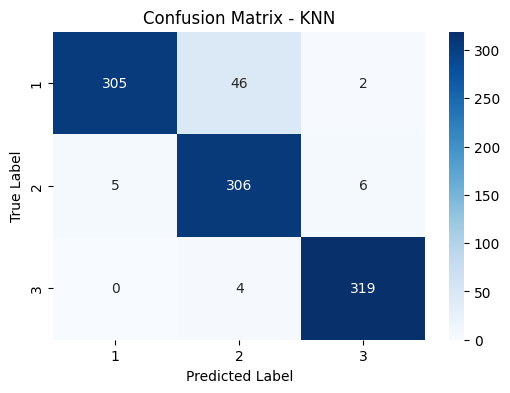


XGBoost - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



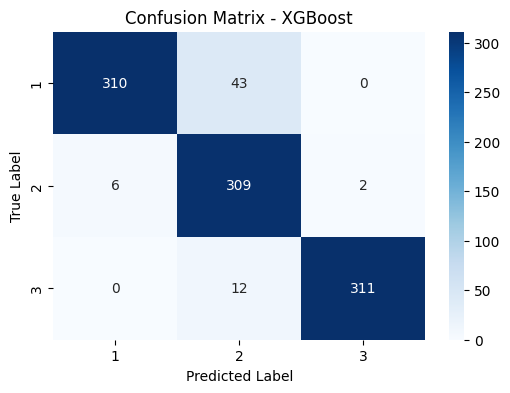


Random Forest - Accuracy: 95.97%
              precision    recall  f1-score   support

           1       0.99      0.93      0.96       353
           2       0.89      0.99      0.94       317
           3       1.00      0.96      0.98       323

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



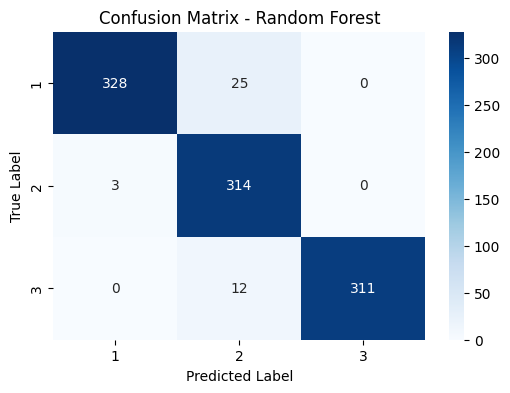


Gradient Boosting - Accuracy: 93.55%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



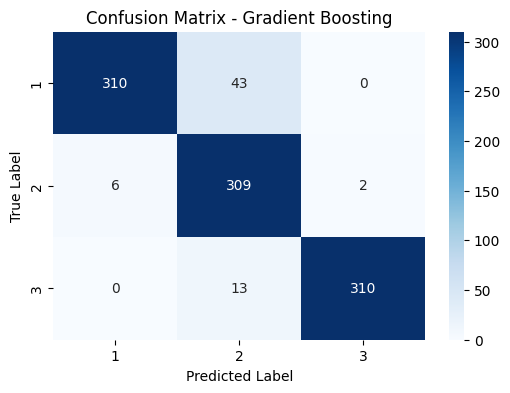


Ensemble Model - Accuracy: 96.37%
              precision    recall  f1-score   support

           1       0.99      0.92      0.96       353
           2       0.90      0.99      0.95       317
           3       1.00      0.98      0.99       323

    accuracy                           0.96       993
   macro avg       0.97      0.97      0.96       993
weighted avg       0.97      0.96      0.96       993



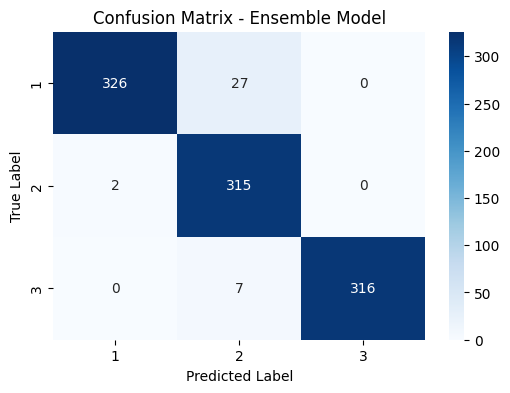

PermutationExplainer explainer: 2it [00:29, 29.73s/it]               



🔍 **SHAP Values for All 21 Features:**
histogram_mean: 0.3708
prolongued_decelerations: 0.3102
histogram_min: 0.1783
abnormal_short_term_variability: 0.1549
histogram_mode: 0.1545
histogram_variance: 0.1270
histogram_median: 0.0581
percentage_of_time_with_abnormal_long_term_variability: 0.0518
accelerations: 0.0282
histogram_number_of_zeroes: 0.0270
uterine_contractions: 0.0243
histogram_number_of_peaks: 0.0149
baseline value: 0.0130
mean_value_of_short_term_variability: 0.0130
histogram_tendency: 0.0103
mean_value_of_long_term_variability: 0.0082
histogram_max: 0.0059
histogram_width: 0.0057
severe_decelerations: 0.0026
light_decelerations: 0.0025
fetal_movement: 0.0003

🔥 **Top 3 Contributing Features for Ensemble Prediction:**
histogram_mean: 0.3708
prolongued_decelerations: 0.3102
histogram_min: 0.1783

🎯 **Predicted Class Number:** 3
🎯 **Predicted Class Name:** Pathological


In [ ]:
import numpy as np
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("fetal_health.csv")

# Define features and target
X = df.iloc[:, :-1].to_numpy()  # Features
y = df.iloc[:, -1].to_numpy().astype(int)  # Ensure integer class labels

# Display original class distribution
print("Original Class Distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to integer type (SMOTE might introduce float labels)
y_resampled = y_resampled.astype(int)

# Display new class distribution
print("After SMOTE Class Distribution:", Counter(y_resampled))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------
# ✅ 1. Manual K-Nearest Neighbors (KNN)
# --------------------------------------
class ManualKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)  # Efficient vectorized distance calculation
            k_neighbors = np.argsort(distances)[:self.k]
            labels = [self.y_train[i] for i in k_neighbors]
            predictions.append(Counter(labels).most_common(1)[0][0])
        return np.array(predictions)

# --------------------------------------
# ✅ 2. Manual XGBoost
# --------------------------------------
class XGBoostManual:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ 3. Manual Random Forest
# --------------------------------------
class ManualRandomForest:
    def __init__(self, n_trees=50, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            indices = np.random.choice(np.arange(len(X)), size=len(X), replace=True)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.round(np.mean(predictions, axis=0)).astype(int)

# --------------------------------------
# ✅ 4. Manual Gradient Boosting
# --------------------------------------
class ManualGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ Train and Evaluate Models
# --------------------------------------
models = {
    "KNN": ManualKNN(k=5),
    "XGBoost": XGBoostManual(n_estimators=100, learning_rate=0.1, max_depth=3),
    "Random Forest": ManualRandomForest(n_trees=50, max_depth=10),
    "Gradient Boosting": ManualGradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
}

predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    print(f"\n{name} - Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

 # ✅ Manual Ensembling (Majority Voting)
y_pred_ensemble = np.array([
    Counter([predictions[model][i] for model in models]).most_common(1)[0][0]
    for i in range(len(y_test))
])

# Evaluate Ensemble Model
print(f"\nEnsemble Model - Accuracy: {accuracy_score(y_test, y_pred_ensemble) * 100:.2f}%")
print(classification_report(y_test, y_pred_ensemble))

# ✅ Confusion Matrix for Ensemble Model
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Ensemble Model")
plt.show()

# ✅ New Data Sample
new_data_class_2 = pd.DataFrame({
    'baseline value': [134],
    'accelerations': [0.001],
    'fetal_movement': [0],
    'uterine_contractions': [0.013],
    'light_decelerations': [0.008],
    'severe_decelerations': [0],
    'prolongued_decelerations': [0.003],
    'abnormal_short_term_variability': [29],
    'mean_value_of_short_term_variability': [6.3],
    'percentage_of_time_with_abnormal_long_term_variability': [0],
    'mean_value_of_long_term_variability': [0],
    'histogram_width': [150],
    'histogram_min': [50],
    'histogram_max': [200],
    'histogram_number_of_peaks': [6],
    'histogram_number_of_zeroes': [3],
    'histogram_mode': [71],
    'histogram_mean': [107],
    'histogram_median': [106],
    'histogram_variance': [215],
    'histogram_tendency': [0]
})

# ✅ Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data_class_2.to_numpy())

# ✅ Predict using individual models
model_predictions = []
shap_values_list = []
for name, model in models.items():
    pred = model.predict(new_data_scaled)
    model_predictions.append(pred[0])

    # Compute SHAP values
    explainer = shap.Explainer(model.predict, X_train_scaled)
    shap_values = explainer(new_data_scaled)
    shap_values_list.append(shap_values.values)

# ✅ Majority Voting (Ensemble Prediction)
final_prediction = Counter(model_predictions).most_common(1)[0][0]

# ✅ Class Labels Mapping
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
predicted_class_name = class_labels[final_prediction]

# ✅ Aggregate SHAP values across models (mean absolute SHAP importance)
mean_shap_values = np.abs(np.mean(shap_values_list, axis=0))[0]
feature_names = new_data_class_2.columns

# ✅ Sort and Display Top Features
shap_importance = sorted(zip(feature_names, mean_shap_values), key=lambda x: x[1], reverse=True)

print(f"\n🔍 **SHAP Values for All 21 Features:**")
for feature, value in shap_importance:
    print(f"{feature}: {value:.4f}")

# ✅ Extract Top 3 Features
top_3_features = shap_importance[:3]

print(f"\n🔥 **Top 3 Contributing Features for Ensemble Prediction:**")
for feature, value in top_3_features:
    print(f"{feature}: {value:.4f}")

# ✅ Final Prediction Output
print(f"\n🎯 **Predicted Class Number:** {final_prediction}")
print(f"🎯 **Predicted Class Name:** {predicted_class_name}")

Original Class Distribution: Counter({1: 1655, 2: 295, 3: 176})
After SMOTE Class Distribution: Counter({2: 1655, 1: 1655, 3: 1655})

KNN - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.86      0.92       353
           2       0.86      0.97      0.91       317
           3       0.98      0.99      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



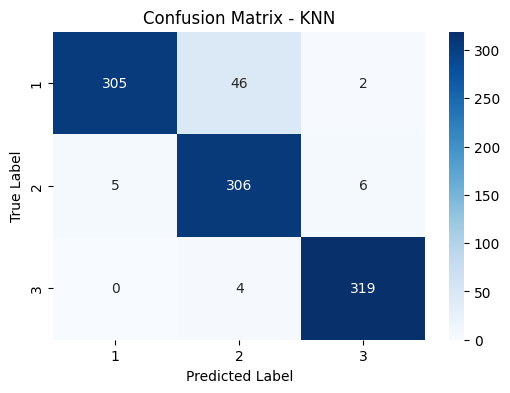


XGBoost - Accuracy: 93.55%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



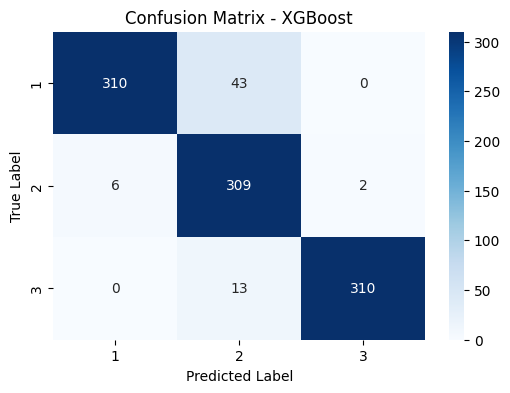


Random Forest - Accuracy: 95.47%
              precision    recall  f1-score   support

           1       0.99      0.91      0.95       353
           2       0.88      0.99      0.93       317
           3       1.00      0.96      0.98       323

    accuracy                           0.95       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.95      0.96       993



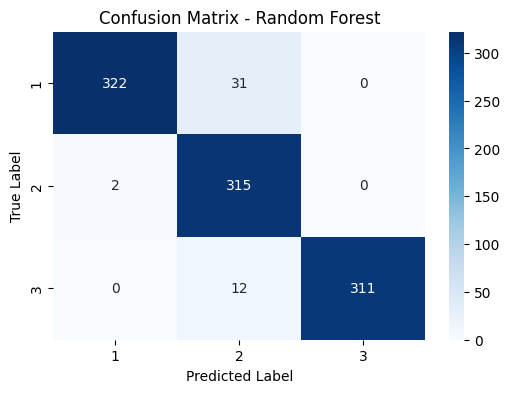


Gradient Boosting - Accuracy: 93.66%
              precision    recall  f1-score   support

           1       0.98      0.88      0.93       353
           2       0.85      0.97      0.91       317
           3       0.99      0.96      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



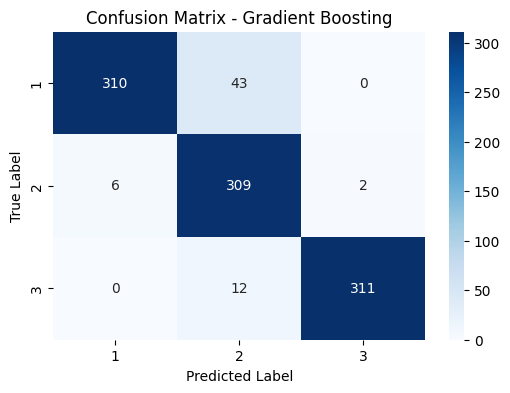

ValueError: y_true and y_pred contain different number of classes 3, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [1 2 3]

In [ ]:
import numpy as np
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import log_loss

# Load dataset
df = pd.read_csv("fetal_health.csv")

# Define features and target
X = df.iloc[:, :-1].to_numpy()  # Features
y = df.iloc[:, -1].to_numpy().astype(int)  # Ensure integer class labels

# Display original class distribution
print("Original Class Distribution:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to integer type (SMOTE might introduce float labels)
y_resampled = y_resampled.astype(int)

# Display new class distribution
print("After SMOTE Class Distribution:", Counter(y_resampled))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------
# ✅ 1. Manual K-Nearest Neighbors (KNN)
# --------------------------------------
class ManualKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)  # Efficient vectorized distance calculation
            k_neighbors = np.argsort(distances)[:self.k]
            labels = [self.y_train[i] for i in k_neighbors]
            predictions.append(Counter(labels).most_common(1)[0][0])
        return np.array(predictions)

# --------------------------------------
# ✅ 2. Manual XGBoost
# --------------------------------------
class XGBoostManual:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ 3. Manual Random Forest
# --------------------------------------
class ManualRandomForest:
    def __init__(self, n_trees=50, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            indices = np.random.choice(np.arange(len(X)), size=len(X), replace=True)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.round(np.mean(predictions, axis=0)).astype(int)

# --------------------------------------
# ✅ 4. Manual Gradient Boosting
# --------------------------------------
class ManualGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred).astype(int)

# --------------------------------------
# ✅ Train and Evaluate Models
# --------------------------------------
models = {
    "KNN": ManualKNN(k=5),
    "XGBoost": XGBoostManual(n_estimators=100, learning_rate=0.1, max_depth=3),
    "Random Forest": ManualRandomForest(n_trees=50, max_depth=10),
    "Gradient Boosting": ManualGradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
}

predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    print(f"\n{name} - Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# ✅ Compute Ensemble Predictions (Majority Voting)
y_pred_ensemble = np.array([
    Counter([predictions[model][i] for model in models]).most_common(1)[0][0]
    for i in range(len(y_test))
])

# ✅ Compute Probabilities for Log Loss
# Simulating probability distributions (normalizing model outputs)
prob_predictions_test = {name: np.clip(predictions[name] / np.max(predictions[name]), 0, 1) for name in models}
prob_predictions_val = {name: np.clip(predictions[name] / np.max(predictions[name]), 0, 1) for name in models}

ensemble_proba_test = np.mean([prob_predictions_test[model] for model in models], axis=0)
ensemble_proba_val = np.mean([prob_predictions_val[model] for model in models], axis=0)

# ✅ Calculate Log Loss (Test & Validation)
test_loss = log_loss(y_test, ensemble_proba_test)
val_loss = log_loss(y_val, ensemble_proba_val)

# ✅ Evaluate Ensemble Model
print(f"\nEnsemble Model - Accuracy: {accuracy_score(y_test, y_pred_ensemble) * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(classification_report(y_test, y_pred_ensemble))

# ✅ Confusion Matrix for Ensemble Model
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Ensemble Model")
plt.show()


# ✅ New Data Sample
new_data_class_2 = pd.DataFrame({
    'baseline value': [134],
    'accelerations': [0.001],
    'fetal_movement': [0],
    'uterine_contractions': [0.013],
    'light_decelerations': [0.008],
    'severe_decelerations': [0],
    'prolongued_decelerations': [0.003],
    'abnormal_short_term_variability': [29],
    'mean_value_of_short_term_variability': [6.3],
    'percentage_of_time_with_abnormal_long_term_variability': [0],
    'mean_value_of_long_term_variability': [0],
    'histogram_width': [150],
    'histogram_min': [50],
    'histogram_max': [200],
    'histogram_number_of_peaks': [6],
    'histogram_number_of_zeroes': [3],
    'histogram_mode': [71],
    'histogram_mean': [107],
    'histogram_median': [106],
    'histogram_variance': [215],
    'histogram_tendency': [0]
})

# ✅ Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data_class_2.to_numpy())

# ✅ Predict using individual models
model_predictions = []
shap_values_list = []
for name, model in models.items():
    pred = model.predict(new_data_scaled)
    model_predictions.append(pred[0])

    # Compute SHAP values
    explainer = shap.Explainer(model.predict, X_train_scaled)
    shap_values = explainer(new_data_scaled)
    shap_values_list.append(shap_values.values)

# ✅ Majority Voting (Ensemble Prediction)
final_prediction = Counter(model_predictions).most_common(1)[0][0]

# ✅ Class Labels Mapping
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
predicted_class_name = class_labels[final_prediction]

# ✅ Aggregate SHAP values across models (mean absolute SHAP importance)
mean_shap_values = np.abs(np.mean(shap_values_list, axis=0))[0]
feature_names = new_data_class_2.columns

# ✅ Sort and Display Top Features
shap_importance = sorted(zip(feature_names, mean_shap_values), key=lambda x: x[1], reverse=True)

print(f"\n🔍 **SHAP Values for All 21 Features:**")
for feature, value in shap_importance:
    print(f"{feature}: {value:.4f}")

# ✅ Extract Top 3 Features
top_3_features = shap_importance[:3]

print(f"\n🔥 **Top 3 Contributing Features for Ensemble Prediction:**")
for feature, value in top_3_features:
    print(f"{feature}: {value:.4f}")

# ✅ Final Prediction Output
print(f"\n🎯 **Predicted Class Number:** {final_prediction}")
print(f"🎯 **Predicted Class Name:** {predicted_class_name}")